In [2]:
from obspy import UTCDateTime
import obspy as obs
from obspy.clients.fdsn import Client as FDSN_Client
import numpy as np


In [4]:
t1 = UTCDateTime("2009-03-24")
t2 = UTCDateTime("2009-03-30")
stname = ['SND']
network = 'AZ'
org = 'IRIS'

client = FDSN_Client(org)


for i, comp in enumerate(['HHE', 'HHN', 'HHZ']):
  land_st1 = client.get_waveforms(network, str(stname[0]), "*", str(comp), t1, t2)
land_st1_original = land_st1.copy()
land_st1 = land_st1_original.copy()
land_st1.detrend()
land_st1.taper(max_percentage=0.05)
land_st1.filter('highpass', freq=2)
selected_times = np.random.choice(land_st1[0].times(), 100, replace=False)


NameError: name 'extract_pairs' is not defined

In [12]:
import sys
sys.path.append("../")
from ground_motion_qh import extract_pairs

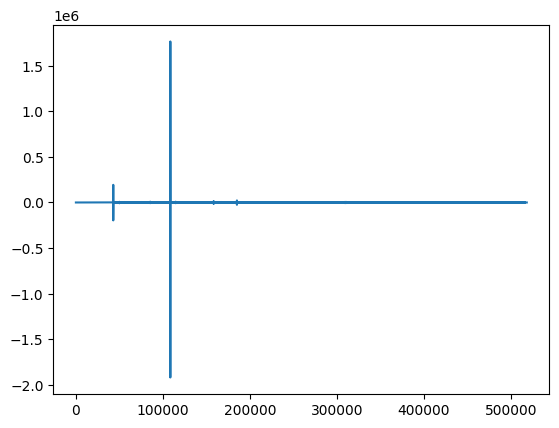

In [10]:
from matplotlib import pyplot as plt

plt.plot(
    land_st1[0].times(),
    land_st1[0].data
)

0.84

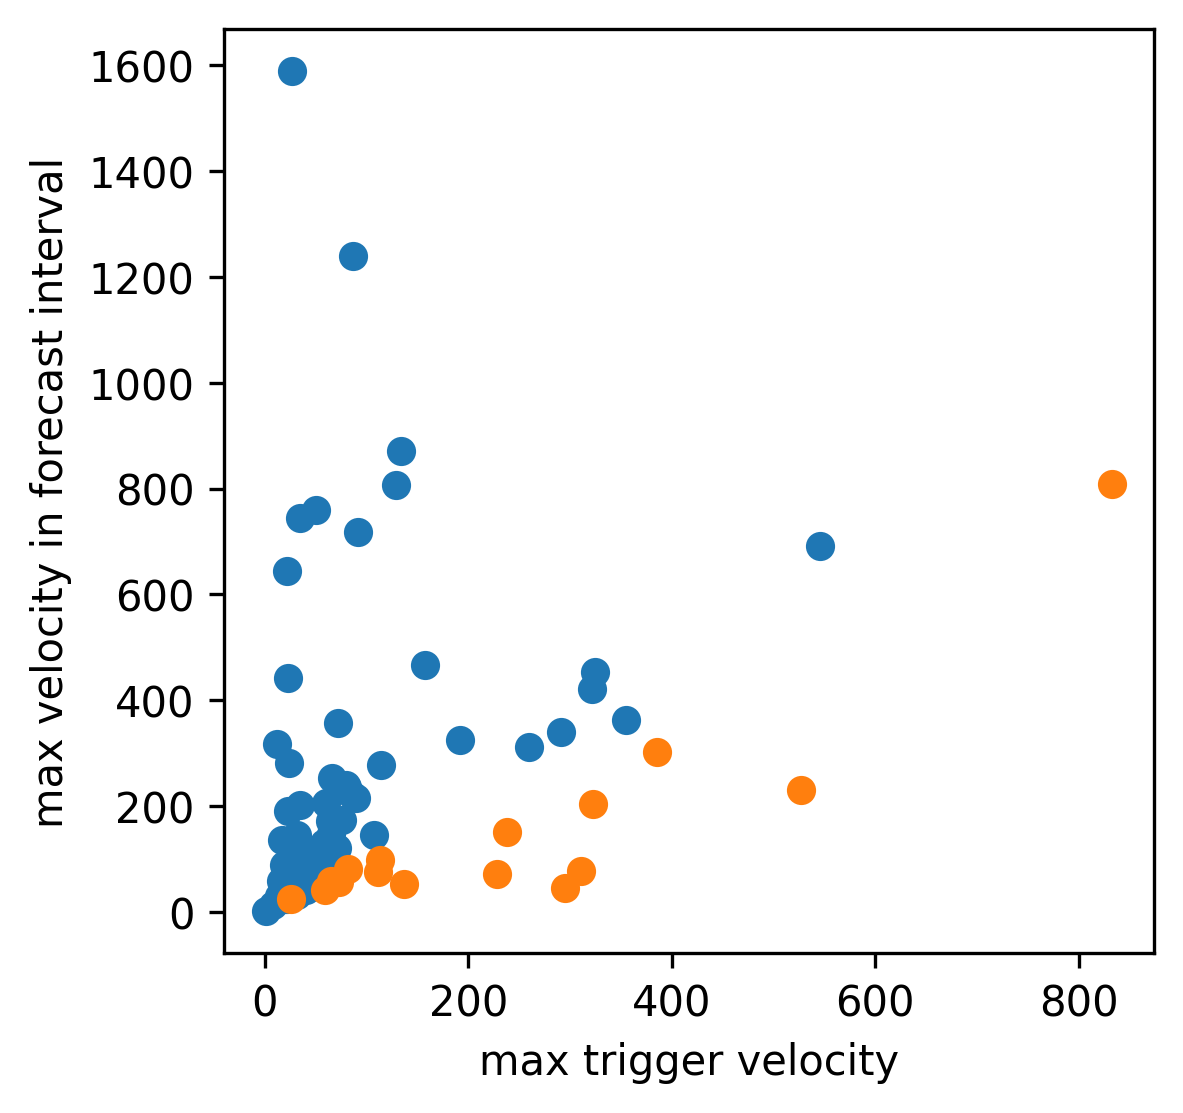

In [13]:

a_minus_vector, a_plus_vector = extract_pairs.waveform_to_max_amp_pairs(
    selected_times,
    land_st1[0].data,
    land_st1[0].times(),
    # tw_minus=TW_MINUS,
    # tw_plus=TW_PLUS,
    # tw_buffer=TW_BUFFER,
)
above_logical = a_plus_vector>a_minus_vector

fig, ax = plt.subplots(dpi=300, figsize = (4,4))
ax.scatter(a_minus_vector[above_logical], a_plus_vector[above_logical])
ax.scatter(a_minus_vector[~above_logical], a_plus_vector[~above_logical])
ax.set_xlabel('max trigger velocity')
ax.set_ylabel('max velocity in forecast interval')
np.mean(a_plus_vector>a_minus_vector)